In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_user_attributes = _hex_json.loads("{}")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"US/Eastern\"")

In [ ]:
hex_project_id = _hex_json.loads("\"01964986-b972-7002-8174-7f4eb539970c\"")

In [ ]:
hex_project_name = _hex_json.loads("\"3162 Project 4\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

In [ ]:
# load data
df = pd.read_csv('fastfood.csv')
df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [ ]:
# basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB
None
          calories      cal_f

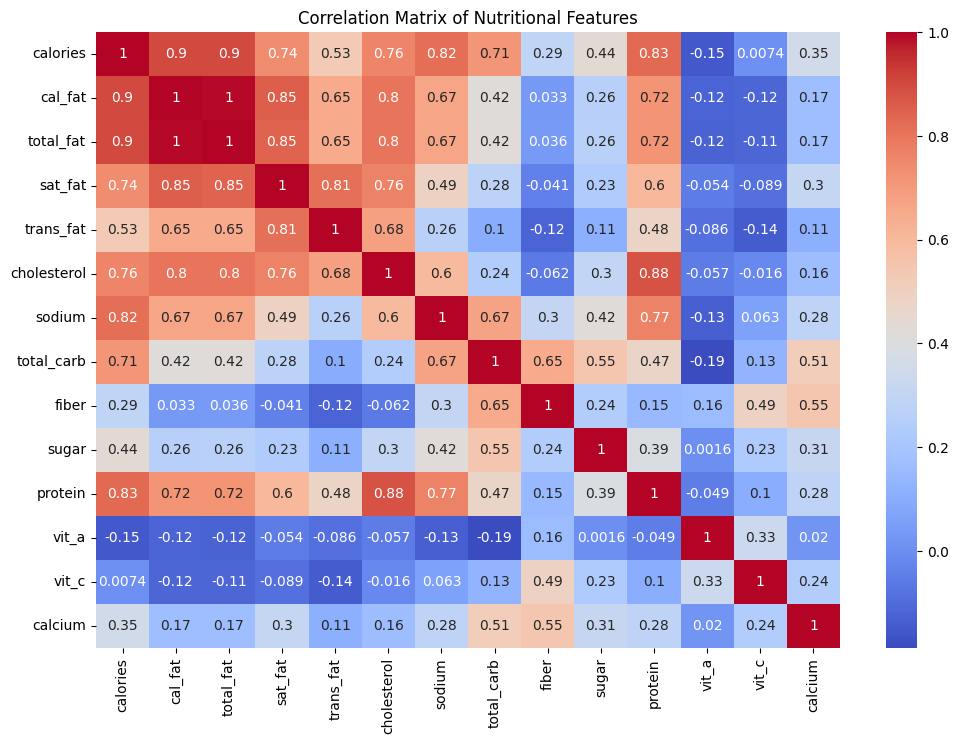

In [ ]:
# correlation matrix
corr = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Nutritional Features')
plt.show()

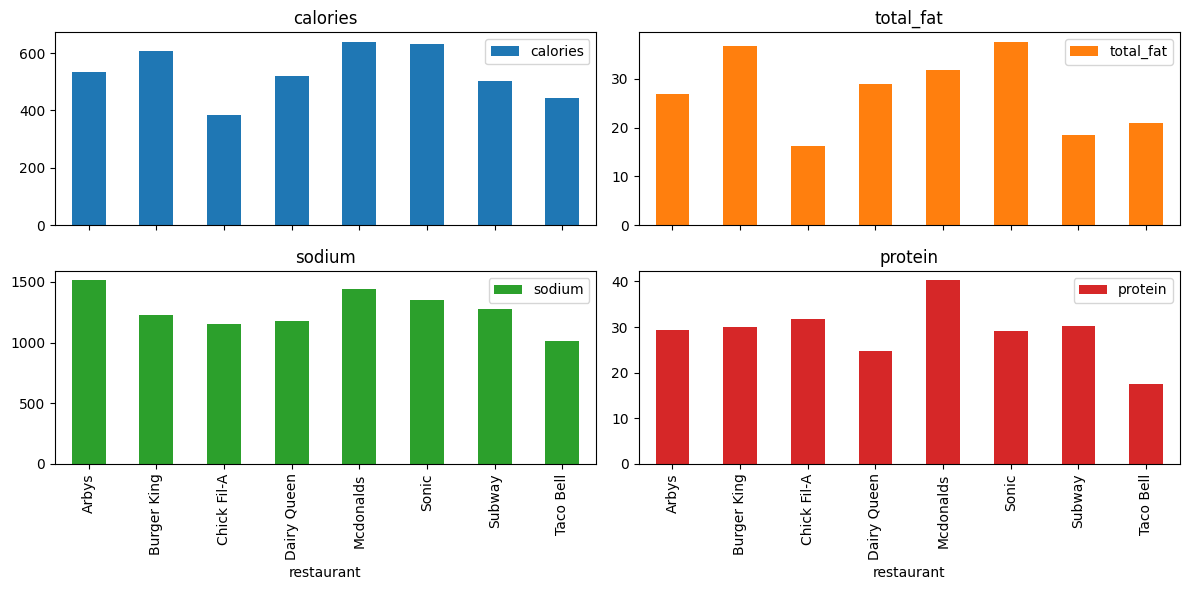

In [ ]:
# nutritional content by restaurant
restaurant_stats = df.groupby("restaurant")[
    ["calories", "total_fat", "sodium", "protein"]
].mean()
restaurant_stats.plot(kind="bar", figsize=(12, 6), subplots=True, layout=(2, 2))
plt.tight_layout()
plt.show()

In [ ]:
# check for missing values
df.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
cluster          0
dtype: int64

In [ ]:
# drop unnecessary columns
drop_columns = ['vit_a','vit_c','calcium','salad']
df = df.drop(columns=drop_columns)

In [ ]:
# select features for clustering
features = ['calories', 'total_fat', 'sodium', 'total_carb', 'sugar', 'protein']
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

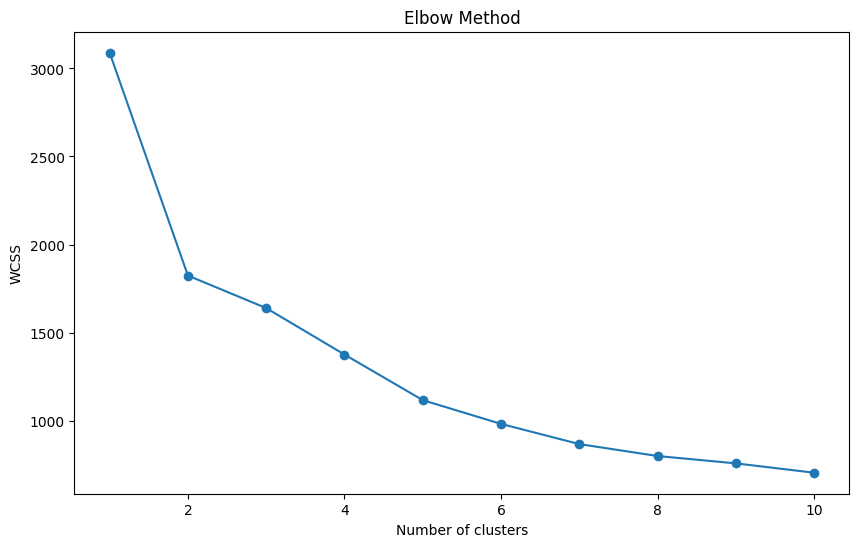

In [ ]:
# elbow method
wcss = []
from sklearn.impute import SimpleImputer

# Impute missing values in X_scaled (if any)
imputer = SimpleImputer(strategy="mean")
X_scaled_imputed = imputer.fit_transform(X_scaled)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled_imputed)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

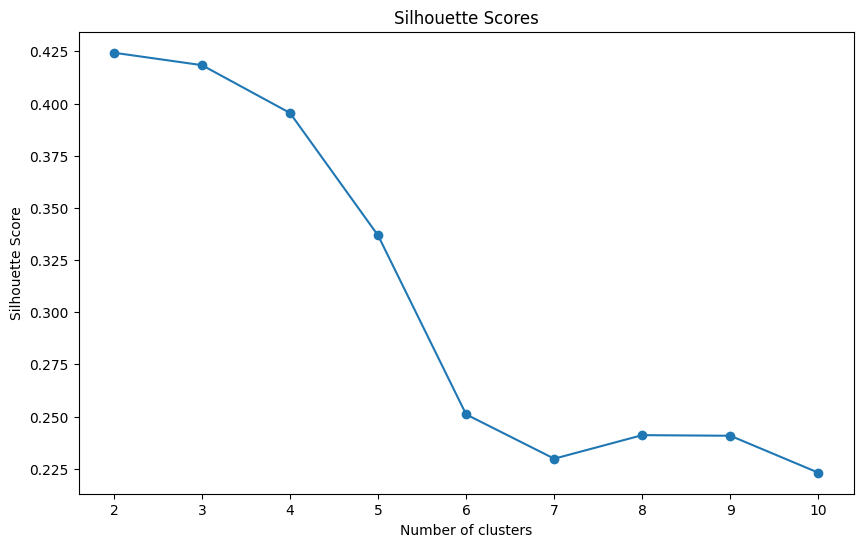

In [ ]:
# silhouette score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled_imputed)
    silhouette_avg = silhouette_score(X_scaled_imputed, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker="o")
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
# k-means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled_imputed)

# add clusters to dataframe
df["cluster"] = clusters
df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,cluster
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,1
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,3
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,3
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,3
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,3


In [ ]:
# import jinja2
# raw_query = """
#     SELECT
#         cluster,
#         restaurant,
#         item
#     FROM df GROUP BY cluster, restaurant, item;
#     
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# agglomerative clustering
agg = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg.fit_predict(X_scaled_imputed)

# compare with k-means
print("Cluster agreement:", (clusters == agg_clusters).mean())

Cluster agreement: 0.013592233009708738


            calories  total_fat       sodium  total_carb     sugar     protein
cluster                                                                       
0        1573.333333  96.333333  3655.000000   63.333333   3.00000  121.666667
1         356.720779  16.967532   861.136364   32.288961   4.87013   19.048701
2        1600.000000  66.000000  4450.000000  156.000000  87.00000   97.000000
3         762.550000  39.120000  1752.300000   65.180000  10.67500   38.402010


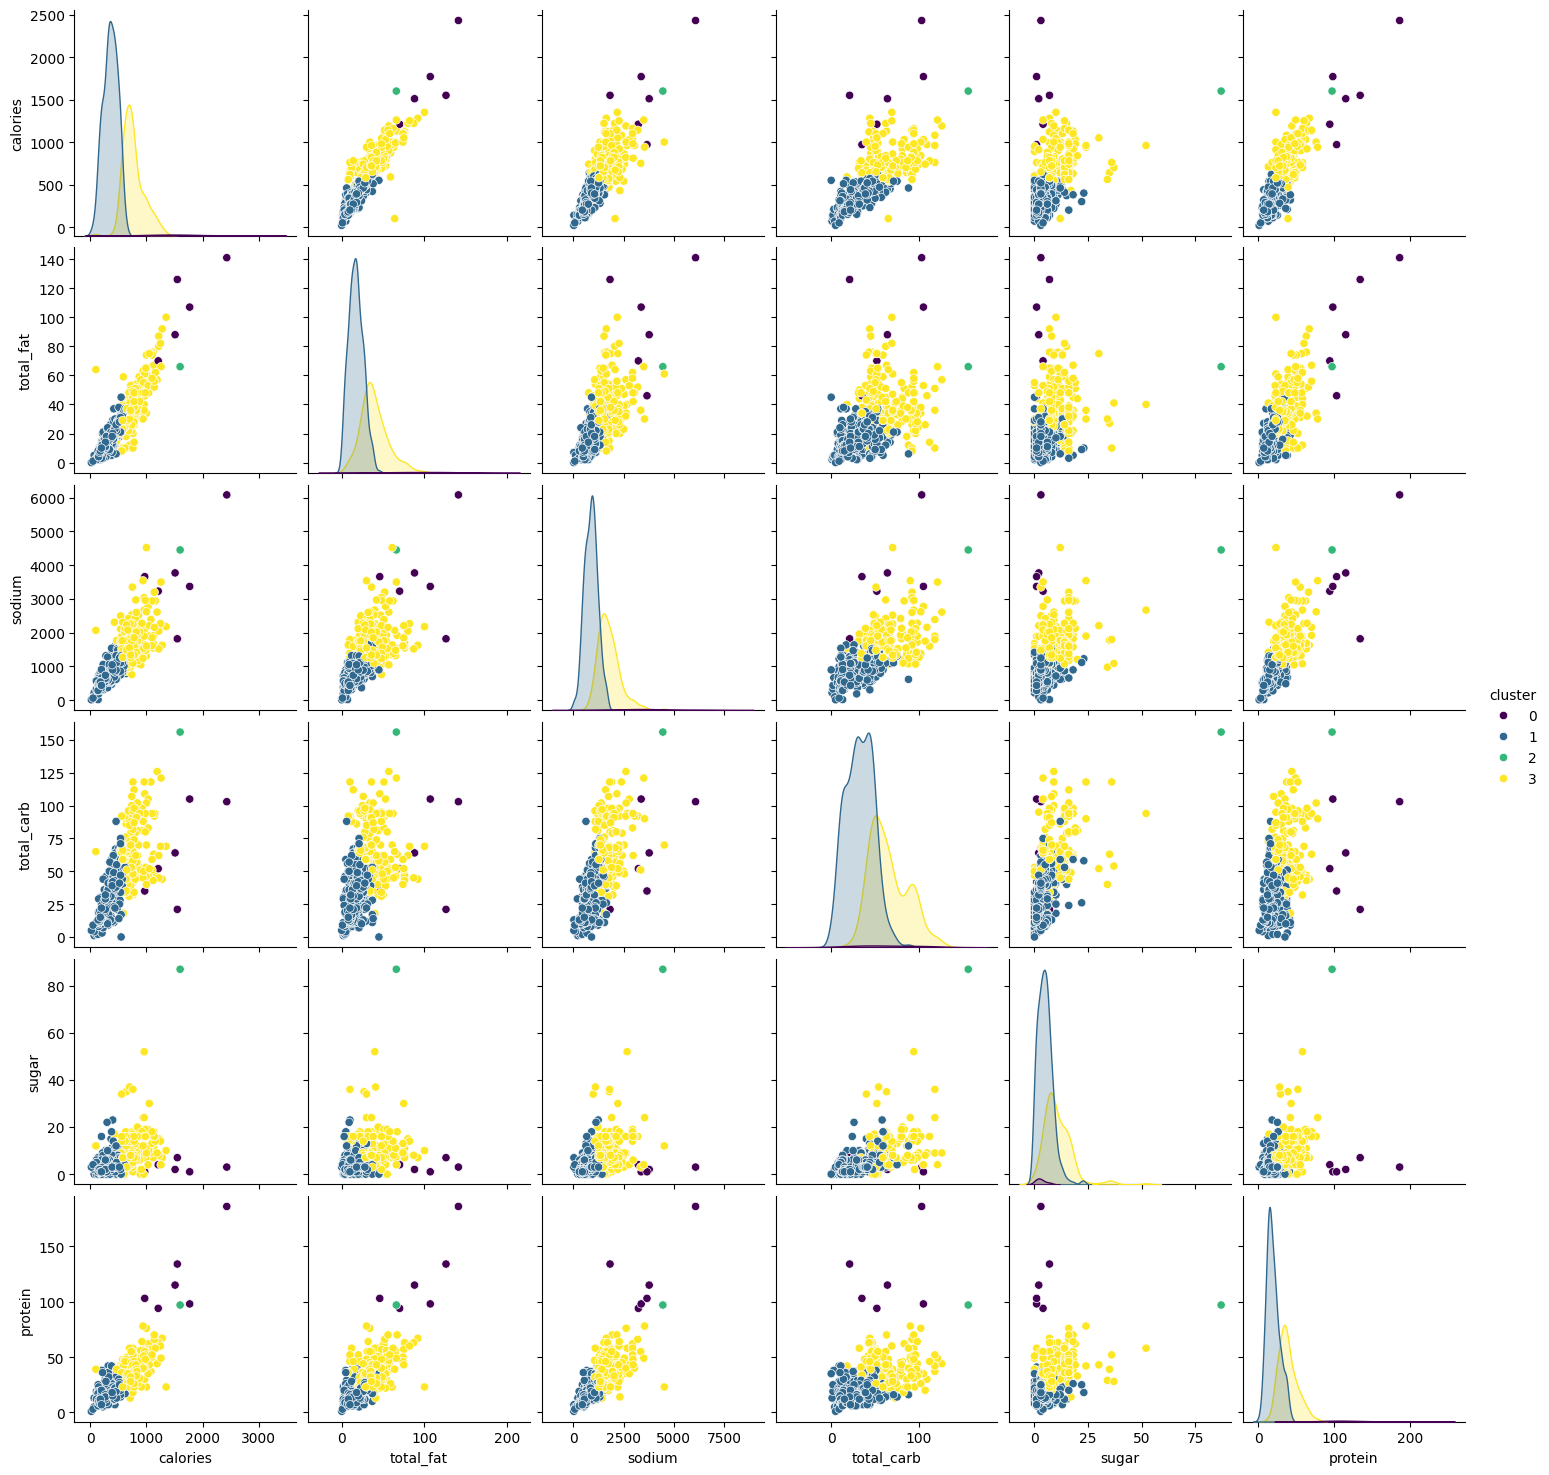

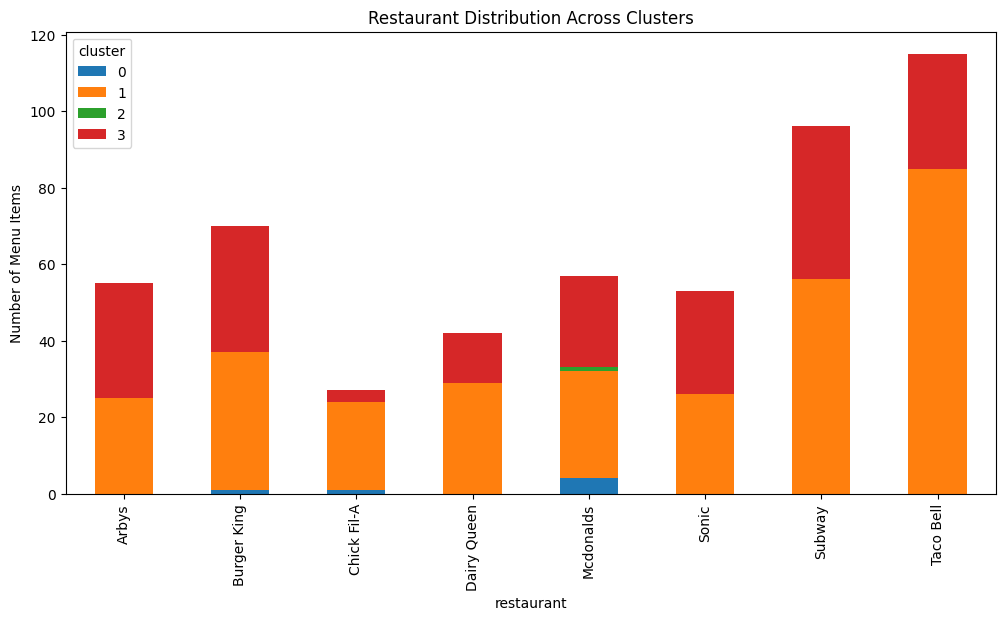

In [ ]:
# cluster statistics
cluster_stats = df.groupby('cluster')[features].mean()
print(cluster_stats)

# visualize clusters
sns.pairplot(df, vars=features, hue='cluster', palette='viridis')
plt.show()

# restaurant distribution across clusters
restaurant_cluster = pd.crosstab(df['restaurant'], df['cluster'])
restaurant_cluster.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Restaurant Distribution Across Clusters')
plt.ylabel('Number of Menu Items')
plt.show()